In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('Fake_Real_Data.csv')

In [4]:
df

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real
...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake
9896,Trump consults Republican senators on Fed chie...,Real
9897,Trump lawyers say judge lacks jurisdiction for...,Real
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake


In [5]:
df.shape

(9900, 2)

In [7]:
df.label.value_counts()

Fake    5000
Real    4900
Name: label, dtype: int64

In [9]:
df['label_code']=df['label'].map({'Fake':0,'Real':1})

In [10]:
df

,Text,label,label_code
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1
...,...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake,0
9896,Trump consults Republican senators on Fed chie...,Real,1
9897,Trump lawyers say judge lacks jurisdiction for...,Real,1
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake,0


In [11]:
import spacy

In [13]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [14]:
df['vector'] = df['Text'].apply(lambda text: nlp(text).vector)  

In [15]:
df

,Text,label,label_code,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.103623025, 0.17802684, -0.11873861, -0.034..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-0.0063406364, 0.16712041, -0.06661373, 0.017..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-0.122753024, 0.17192385, -0.024732638, -0.06..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-0.027337318, 0.12501417, -0.0073965387, -0.0..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-0.032708026, 0.093958504, -0.03287002, -0.00..."
...,...,...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake,0,"[-0.059300978, 0.15469816, -0.10287861, -0.008..."
9896,Trump consults Republican senators on Fed chie...,Real,1,"[-0.06228962, 0.17716025, -0.022026023, -0.038..."
9897,Trump lawyers say judge lacks jurisdiction for...,Real,1,"[-0.06399673, 0.14769955, -0.042517494, -0.020..."
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake,0,"[-0.0388547, 0.20790869, -0.08706406, -0.06820..."


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label_code,
    test_size=0.2,
    random_state=2022
)

In [22]:
X_train

array([array([-2.37034578e-02,  1.48199528e-01, -5.90629913e-02, -3.08816023e-02,
               7.27375224e-02, -3.08532882e-02, -3.06985099e-02, -1.34581909e-01,
              -2.89440658e-02,  2.11217093e+00, -2.11404130e-01, -1.30848298e-02,
               9.76289958e-02, -8.72511789e-02, -1.27175421e-01, -7.87014738e-02,
              -4.45573106e-02,  8.96639585e-01, -7.74146467e-02, -1.98509209e-02,
              -4.66989167e-03,  3.00393123e-02, -5.44604585e-02, -3.01919542e-02,
               2.35033669e-02,  4.78319898e-02, -1.07414149e-01, -4.99117828e-04,
               6.58109086e-03, -7.65082892e-03,  2.21302323e-02,  3.81453149e-02,
               2.45294645e-02,  8.50784853e-02,  4.57540490e-02, -2.83517223e-02,
              -2.62076780e-02,  9.25419573e-03, -4.42117751e-02, -1.07683197e-01,
               9.35755111e-03,  6.35481179e-02,  5.63387387e-02, -6.61794245e-02,
               1.34266177e-02,  1.39213279e-02, -8.35610852e-02, -3.96741964e-02,
               2

In [19]:
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [21]:
X_train

array([array([-2.37034578e-02,  1.48199528e-01, -5.90629913e-02, -3.08816023e-02,
               7.27375224e-02, -3.08532882e-02, -3.06985099e-02, -1.34581909e-01,
              -2.89440658e-02,  2.11217093e+00, -2.11404130e-01, -1.30848298e-02,
               9.76289958e-02, -8.72511789e-02, -1.27175421e-01, -7.87014738e-02,
              -4.45573106e-02,  8.96639585e-01, -7.74146467e-02, -1.98509209e-02,
              -4.66989167e-03,  3.00393123e-02, -5.44604585e-02, -3.01919542e-02,
               2.35033669e-02,  4.78319898e-02, -1.07414149e-01, -4.99117828e-04,
               6.58109086e-03, -7.65082892e-03,  2.21302323e-02,  3.81453149e-02,
               2.45294645e-02,  8.50784853e-02,  4.57540490e-02, -2.83517223e-02,
              -2.62076780e-02,  9.25419573e-03, -4.42117751e-02, -1.07683197e-01,
               9.35755111e-03,  6.35481179e-02,  5.63387387e-02, -6.61794245e-02,
               1.34266177e-02,  1.39213279e-02, -8.35610852e-02, -3.96741964e-02,
               2

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)


clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [26]:
y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1024
           1       0.95      0.95      0.95       956

    accuracy                           0.95      1980
   macro avg       0.95      0.95      0.95      1980
weighted avg       0.95      0.95      0.95      1980



In [27]:
from  sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

clf.fit(X_train_2d, y_train)

y_pred = clf.predict(X_test_2d)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1024
           1       0.97      0.99      0.98       956

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



Text(95.72222222222221, 0.5, 'Truth')

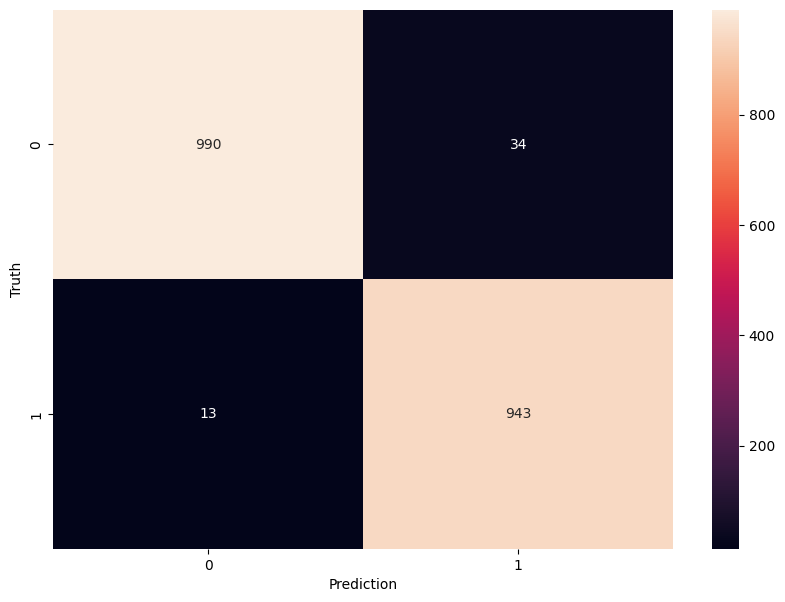

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')